In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

### Data Reading and Understanding

In [57]:
data = pd.read_csv("day.csv")
data.shape

(730, 16)

In [58]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


just for better understanding of the data we will paste our data dictionary here
  - instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy - Clear
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - Light_Snow_Rain
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog - Heavy_Rain
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


### Let us start with data preperation first

In [59]:
# instant is just index numbers, so we set instant to indexes
data = data. set_index('instant')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [61]:
# let us derive the day(1-30/31) from the dteday column and drop the dteday colum
# we also need to drop registered and casual columns as the sum of these 2 columns equals our target column which is cnt
# lets cerate dummy varibales for weathersit and season column, right now our data for these columns is label encoded - lets check if creating dummies will have any effect of not
from datetime import date
data.dteday = pd.to_datetime(data.dteday)
data["day"] = [i.day for i in data.dteday]
data.drop(['dteday','registered','casual'],axis=1, inplace=True)
data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'})
data.season = data.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
data.mnth = data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
data.weekday = data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

### EDA

In [62]:
data.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
instant,,,,,,,,,,,,,
1,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
2,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1
3,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1
4,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1
5,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1


<AxesSubplot:xlabel='workingday', ylabel='cnt'>

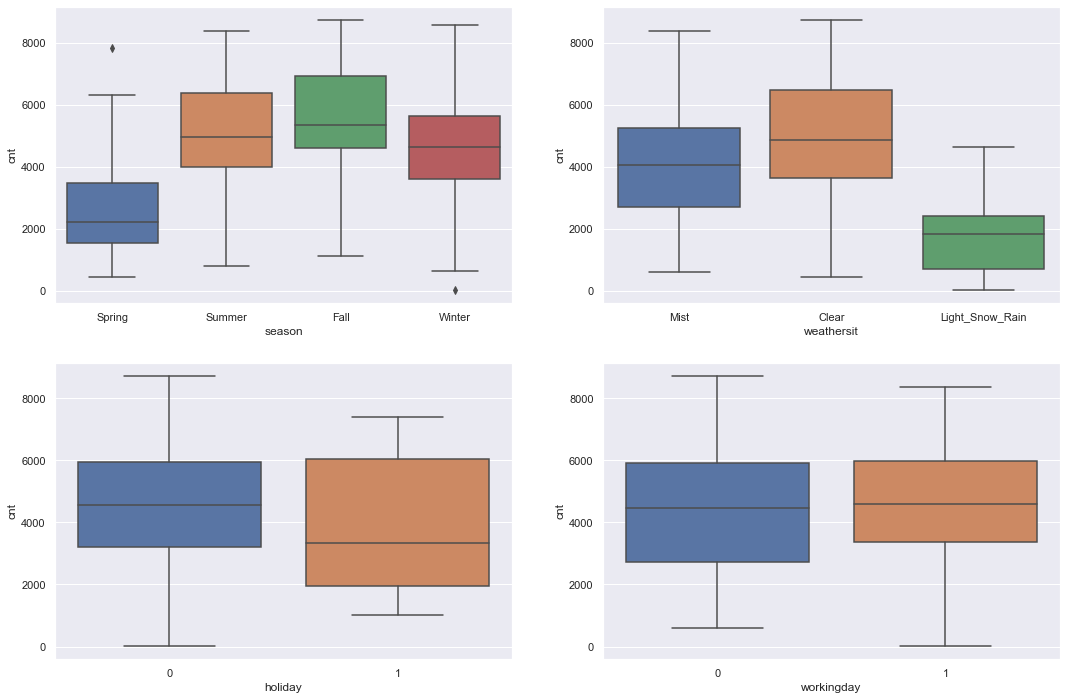

In [63]:
#let us look at the distributions of count of bikes rented as per the season
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(x="season", y="cnt", data=data, ax=ax1)
sns.boxplot(x="weathersit", y="cnt", data=data, ax=ax2)
sns.boxplot(x="holiday", y="cnt", data=data, ax=ax3)
sns.boxplot(x="workingday", y="cnt", data=data, ax=ax4)

Above we have plotted all the categorial variables distribution with respect to the count/sales variable.
><li> we do not see any outliers in any of our variable.<br>
><li> we can also conclude that we can have more number of riders in Summer and Fall compared to other seasons.<br>
><li> we can expect more sales when we have a clear weather.<br>
><li> we do not see if any difference in sales when it comes to working or non-working day.

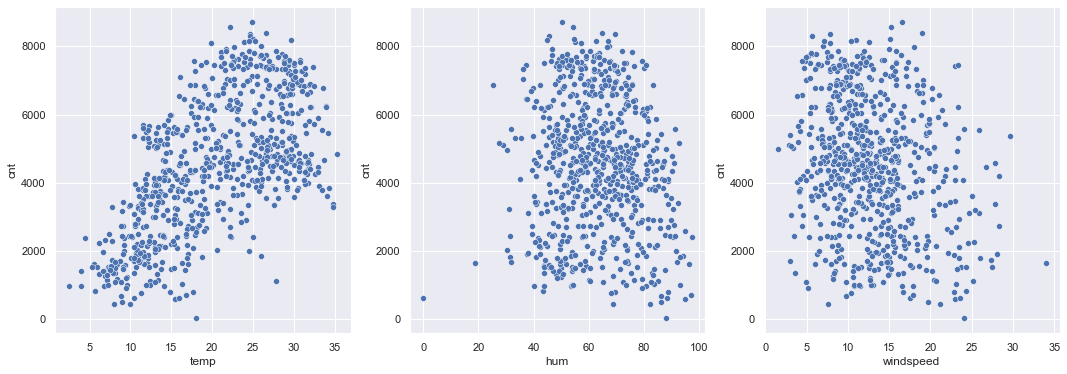

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
sns.scatterplot(x="temp", y="cnt", data=data, ax=ax1)
sns.scatterplot(x="hum", y="cnt", data=data, ax=ax2)
sns.scatterplot(x="windspeed", y="cnt", data=data, ax=ax3)
fig.show()

Checking if there is any Linear relationship between our continous variables and our target variable.
> we see some linear relation between count and the temp variable.<br>
> for the other 2 variables we cannot say the same.(no pattern)

<AxesSubplot:ylabel='cnt'>

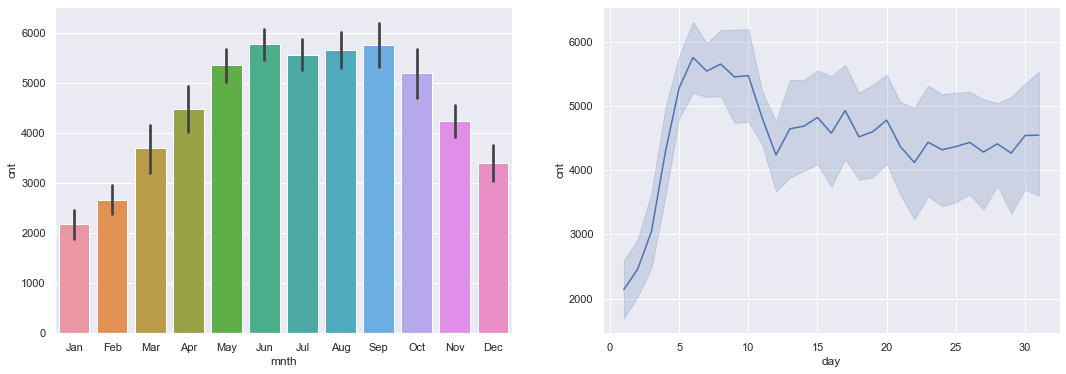

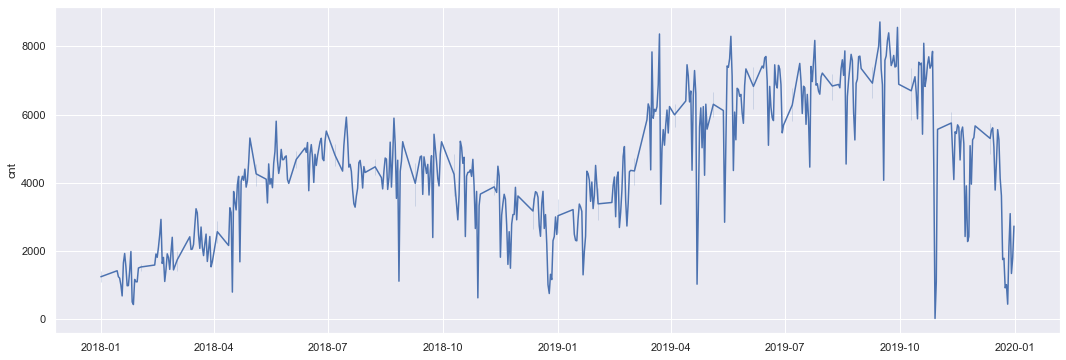

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
sns.barplot(x="mnth", y="cnt", data=data, ax=ax1)
sns.lineplot(x="day", y="cnt", data=data, ax=ax2)
fig.show()
sales = [str(i)+'-'+str(j)+'-'+str(k) for i,j,k in zip(data.day, data.mnth, data.yr.map({0:'2018',1:'2019'}))]
fig, (ax1) = plt.subplots(1, 1, figsize=(18,6))
sns.lineplot(x=pd.to_datetime(sales), y=data.cnt, ax=ax1)

Looking at the sales of the company as per the time series data we have
> <li> we see a rise number of riders in the month of may to october
> <li> and also if we look at avergae number of riders on a day in a month we see number of riders rising in between 5th and 10th day of the month
> <li> looking at our 3rd chart of time series we can expect an increase in the number riders every year.

In [66]:
# creating dummies 
season_dummy = pd.get_dummies(data.season,drop_first=True)
weather_dummy = pd.get_dummies(data.weathersit,drop_first=True)
month_dummy = pd.get_dummies(data.mnth,drop_first=True)
weekday_dummy = pd.get_dummies(data.weekday,drop_first=True)
final_df = data.join(season_dummy)
final_df = final_df.join(weather_dummy)
final_df = final_df.join(month_dummy)
final_df = final_df.join(weekday_dummy)
final_df.drop(['season','weathersit','mnth','weekday'], axis=1, inplace=True)
print(final_df.shape)
final_df.head()

(730, 31)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,Spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,1,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,1,...,0,0,0,0,0,0,0,0,0,1


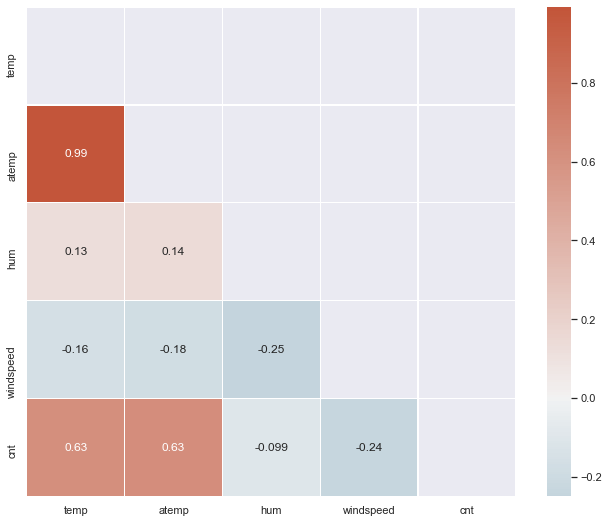

In [67]:
# let us look at the correation matrix of the data
corr = data[['temp','atemp','hum','windspeed','cnt']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, annot=True)
f.show()

as we per the EDA performed above we saw a linear pattern between temp and the target variable and also we see that temp and atemp are highly correlated.

In [68]:
final_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,Spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,15.720548,0.246575,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,8.802278,0.431313,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modeling

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### <b>Model 1: Selecting all the available features for processing -> BASE</b>

In [70]:
# creating a method for linear regression so that we can re use it again with different features
def lin_reg(X_train, y_train, X_test, y_test):
  X_train = sm.add_constant(X_train) # adding a constant
  model = sm.OLS(y_train, X_train).fit()
  X_test = sm.add_constant(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
  print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))
  print(model.summary())
  sns.regplot(y_test,y_pred_test)
  return model

R2 Score of the training data: 0.8581616896806937
R2 Score of the testing data: 0.8127892013116167
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     100.4
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.17e-183
Time:                        15:17:19   Log-Likelihood:                -4094.2
No. Observations:                 511   AIC:                             8248.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

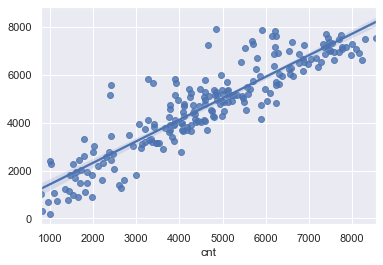

In [71]:
# Train test split ######################################################################
X = final_df.drop('cnt', axis=1)
y = final_df.cnt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
# Sacling the numerical variables #######################################################
num_cols = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
scaler.fit(X_train[num_cols])
train_scaled = scaler.transform(X_train[num_cols])
test_scaled = scaler.transform(X_test[num_cols])
# Scaling training data
X_train[num_cols] = train_scaled
# Scaling test data
X_test[num_cols] = test_scaled
# Applying Linear Regression ############################################################
# Creating a base model to check the initial results
model_1 = lin_reg(X_train, y_train, X_test, y_test)

After getting the intial results we see that although our R<sup>2</sup> and adj.R<sup>2</sup> is 85% and 84%, our F statistic is low and also we see that the p value for lot of our variables is very high. we also see a problem of multi-collinearity.<br>
<b>Let us try to solve the problem of multi-collinearity using VIF and also we will iteratively drop variables which has high p-value</b> (high p-value implies that the variable is not very significant for predictig the results & high VIF signifies that a variable is highly correlated with other variables).

### <b>Model 2: Feature Selection Using VIF and P-Values</b>


> Our plan here is to look at the P-Values first and drop a variable with the highest P-Value (Least Signifianct variable) and then caluculate the VIF for all the avriables and drop the one with highest VIF value (which is highly correlated with other variables).<br>
><b>Note: we perform the dropping of the variables one at a time.</b><br>
>After creating the dummy variables our data set now has lot of columns, so rather than checking p values and VIFs manually, I've created functions which will keep on iterating over our training data set until it has removed all the variables with VIF > 5 and variables with P-Value > 0.05

In [72]:
''' 
although we have a function created above for linear regression, we have created here another one as we do not need
to print summary and the chart everytime we create a model to check the p values.
'''
def lin_reg_2(X_train, y_train, X_test, y_test):
  X_train = sm.add_constant(X_train) # adding a constant
  model = sm.OLS(y_train, X_train).fit()
  X_test = sm.add_constant(X_test)
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
  print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))
  return model

In [73]:
# this method will get the p-values from the model, sort it in descending order and return the sorted data frame. 
# (this will help us pick up the variable with highest pvalue and drop it)
def get_pvalues(model):
  pval = pd.DataFrame(data= model.pvalues, columns=['Pvalue'])
  pval['feature'] = pval.index
  pval.reset_index(drop=True, inplace=True)
  pval['Pvalue'] = [round(i,3) for i in pval['Pvalue']]
  pval = pval[['feature','Pvalue']].sort_values('Pvalue', ascending=False)
  return pval

In [74]:
# this method will compute VIFs for all the variables, sort it in descending order and return the sorted data frame. 
# (this will help us pick up the variable with highest VIF and drop it)
def get_VIF(X_train):
  columns = X_train.columns
  # VIF DataFrame
  vif_data = pd.DataFrame()
  vif_data["feature"] = X_train.columns
  # calculating VIF for each feature
  vif_data["VIF"] = [variance_inflation_factor(X_train[columns].values, i) for i in range(len(columns))]
  vif_data = vif_data.sort_values('VIF', ascending=False)
  return vif_data

In [75]:
'''
This Method will Iterate over our list of variables calculating P values and VIF's for each variable,
until we eliminate all the varibales with high VIFs and high P-values
we drop variables one at a time, and after every time we drop a variable we compute the VIF and P-values again for all the variables.
'''
def pval_vif_feature_selection(X_train, X_test):
  flag_1 = False # the flag is set to True when we have eliminated all the variables with high VIF
  flag_2 = False # the flag is set to True when we have eliminated all the variables with high P-Values
  X_train_VIF = X_train
  cols = X_train_VIF.columns # inital list of our columns (contains all variables)
  # the below loop will run until we have eliminated all the variables with high collinearity and high p values.
  while True:
    # creating a model in stats model to look at the p values and drop columns which are not significant
    X_train_VIF = X_train[cols]
    X_test_VIF = X_test[cols]
    model = lin_reg_2(X_train_VIF, y_train, X_test_VIF, y_test)
    pvalues = get_pvalues(model) 
    # dropping a variable with the highest p-value
    if pvalues['Pvalue'].tolist()[0]>0.05:
      print("Dropping",pvalues['feature'].tolist()[0],"with Pvalue",pvalues['Pvalue'].tolist()[0])
      cols = cols.drop(pvalues['feature'].tolist()[0])
    else:
      if not flag_2:
        print("\n----------------------------------------------\nDropped columns with high pvalues - None Left\n----------------------------------------------")
      flag_2 = True
    X_train_VIF = X_train[cols]
    # calling the VIF method
    vif_data = get_VIF(X_train_VIF)
    # dropping a variable with the highest VIF
    if vif_data['VIF'].tolist()[0]>5:
      print("Dropping",vif_data['feature'].tolist()[0],"with VIF",vif_data['VIF'].tolist()[0])
      cols = cols.drop(vif_data['feature'].tolist()[0])
    else:
      if not flag_1:
        print("\n----------------------------------------------------\nDropped All columns with high collinearity - None Left\n----------------------------------------------------")
      flag_1 = True
    # when both flags are set to True we exit the loop
    if flag_1 and flag_2:
      print(vif_data,"\n")
      print(pvalues)
      return cols
    print()

In [76]:
# running the above explained method, 
# please have a look at the output below as it explains which variables we are dropping and how it is affecting our R2 score
X_train_VIF = X_train
X_test_VIF = X_test
columns = pval_vif_feature_selection(X_train_VIF, X_test_VIF)

R2 Score of the training data: 0.8581616896806937
R2 Score of the testing data: 0.8127892013116167
Dropping Oct with Pvalue 0.95
Dropping workingday with VIF 84.89487399386223

R2 Score of the training data: 0.858160538837742
R2 Score of the testing data: 0.812829308059075
Dropping Aug with Pvalue 0.959
Dropping temp with VIF 389.4019743935505

R2 Score of the training data: 0.8556961115805488
R2 Score of the testing data: 0.8165561512005868
Dropping Mar with Pvalue 0.994
Dropping hum with VIF 36.032982453334576

R2 Score of the training data: 0.847708028272398
R2 Score of the testing data: 0.8189713117492311
Dropping Summer with Pvalue 0.849
Dropping atemp with VIF 11.155833850804264

R2 Score of the training data: 0.8139611591952276
R2 Score of the testing data: 0.7856658066313276
Dropping Sat with Pvalue 0.963

----------------------------------------------------
Dropped All columns with high collinearity - None Left
----------------------------------------------------

R2 Score of 

R2 Score of the training data: 0.810456629402294
R2 Score of the testing data: 0.7822201267292601
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     141.1
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          9.35e-168
Time:                        15:17:20   Log-Likelihood:                -4168.3
No. Observations:                 511   AIC:                             8369.
Df Residuals:                     495   BIC:                             8436.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

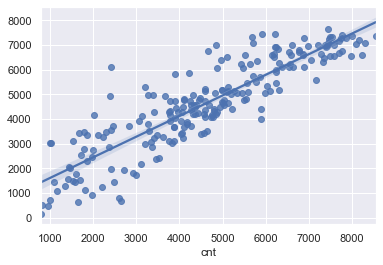

In [77]:
### let us now create a model with the columns we have and do a detailed analysis on the model to check if our model can explain the variance
X_train_VIF = X_train[columns]
X_test_VIF = X_test[columns]
model_2 = lin_reg(X_train_VIF, y_train, X_test_VIF, y_test)

<b>Observation:</b>
>After creating our 2<sup>nd</sup> model we see that although our R<sup>2</sup> and adj.R<sup>2</sup> have been reduced by 2/3 percent but our F-statictic has significantly increased suggesting a good fit. also, we took care of the multi collinearity problem by dropping the variables with high VIF. the variables we have now are also significant with p-values < 0.05.<br>
>now that we have made some progress, but it was a manual approach. so let us use another feature selection technique RFE and check if we get any different results than this.

#### Model 3: Using RFE for Feature Selection

R2 Score of the training data: 0.8510477780243697
R2 Score of the testing data: 0.80725058057577
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.60e-193
Time:                        15:17:20   Log-Likelihood:                -4106.7
No. Observations:                 511   AIC:                             8245.
Df Residuals:                     495   BIC:                             8313.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

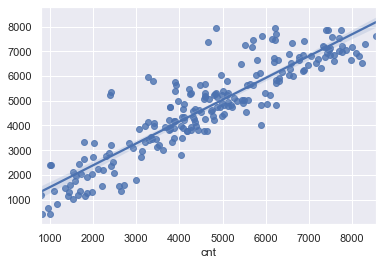

In [78]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
#Use RFE to remove not significant features from the initial model.
rfe = RFE(lm, step=1)
rfe = rfe.fit(X_train, y_train)
#Test new model
#New features dataframe containing only selected features through RFE
X_RFE = X_train[X_train.columns[rfe.support_]]
X_RFE_test = X_test[X_test.columns[rfe.support_]]
model_3 = lin_reg(X_RFE, y_train, X_RFE_test, y_test)

<b>Observation:</b>
>After creating our 3<sup>rd</sup> model using RFE feature selection technique we see that our R<sup>2</sup> and adj.R<sup>2</sup> have increased compared to our 2<sup>nd</sup> model and our F-statictic has also significantly increased suggesting a good fit. also, RFE took care of the multi collinearity problem for us and we do not see high P-values for any of the variable<br>

### Residual Analysis & Linear Assumptions Checks

---



In [79]:
# method for cheking LR assumptions
def assumptions(model, X_train, X_test, y_train, y_test):
  # 0. checking R2 score on test and training set
  r2_test = r2_score(y_test,model.predict(sm.add_constant(X_test)))
  r2_train = r2_score(y_train,model.predict(sm.add_constant(X_train)))
  print("R2 for training set:",r2_train,"\nR2 for test set:",r2_test)
  # 1. checking if the residual mean is 0
  y_pred = model.predict(sm.add_constant(X_train))
  residuals = y_train.values - y_pred
  print("Residual Mean Error is:",round(residuals.mean(),3))
  # 2. check for homoscedasticity
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(28,6))
  sns.scatterplot(y_pred,residuals, ax=ax1)
  ax1.set_xlabel("Residuals")
  ax1.set_ylabel("Predictions")
  ax1.set_title("Homoscedasticity Check")
  sns.lineplot([0,8000],[0,0],color='red', ax=ax1)
  # 3. check for normality of error terms/residuals
  sns.distplot(residuals, ax=ax2)
  ax2.set_xlabel("Residuals")
  ax2.set_title("Normality of Error Terms Check")
  # 4. check for multi collinearity
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(X_train.corr(), cmap=cmap, ax=ax3)
  ax3.set_title("Multi-Collinearity Check")

chart 1: is the test of homoscedasticity where we check if the variance is constant<br>
chart 2: is the test we check id the residuals are normallu distributed.<br>
chart 3: is there multi collinearity present<br>

R2 for training set: 0.8510477780243697 
R2 for test set: 0.80725058057577
Residual Mean Error is: -0.0


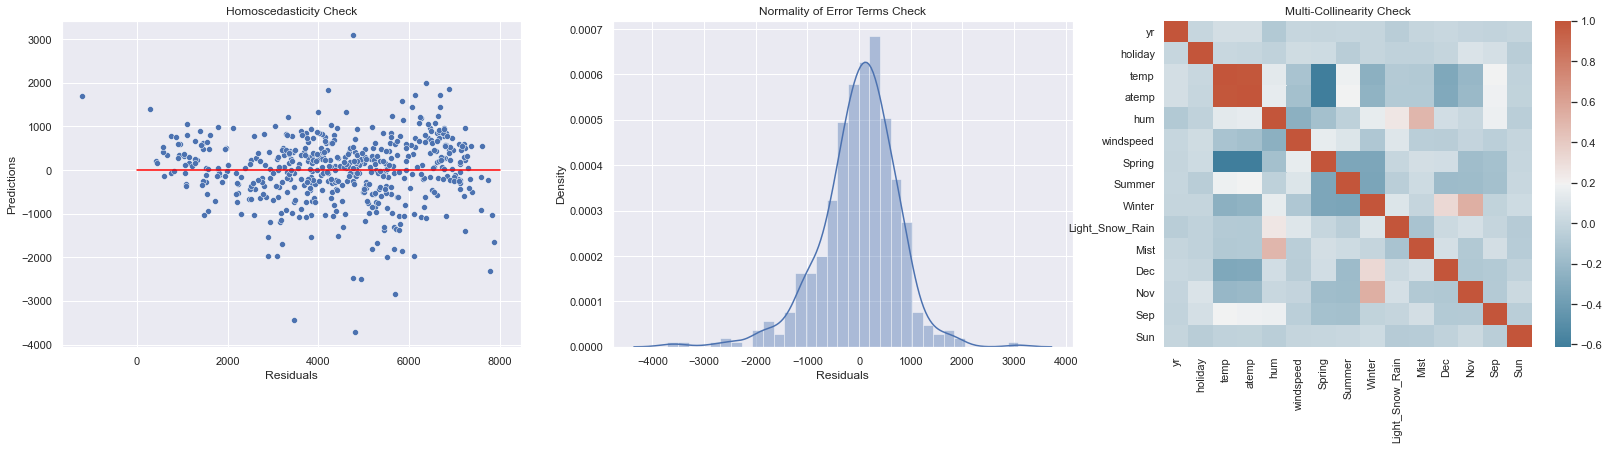

In [80]:
# Model 3 Residual Analysis
assumptions(model_3,X_RFE, X_RFE_test,y_train,y_test)

R2 for training set: 0.810456629402294 
R2 for test set: 0.7822201267292601
Residual Mean Error is: 0.0


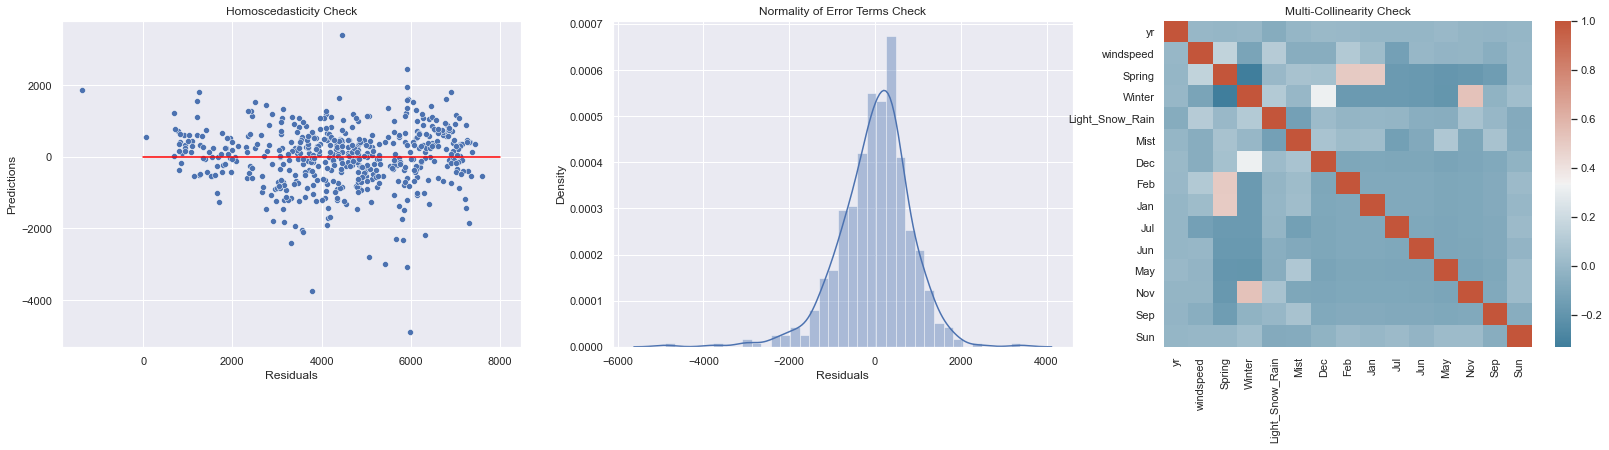

In [81]:
# Model 2 Residual Analysis
assumptions(model_2,X_train[columns], X_test[columns],y_train,y_test)

>we see that both our models <b><i>satisfies all the assumptions of linear regression.</i></b> also the r2 on training and test set is pretty close. we can say we have achieved a generalised model.<br>
although our adj. R2 for model 3 is higher than model 2 so we go ahead and select model 3.<br>
<b>Note: we have not performed residual analysis on model 1 as there we have multi collinearity problem and lot of out variables are not significant for the model.</b>

<b>Conclusion</b>
>Consedering the adj.R<sup>2</sup>, F-statistic and the number of significant variables present we can safely conclude that model 3 which we created using RFE is our best model and can best explain the variance of the data.<br>
> So to predict future sales for boom bikes we can go ahead and deploy our model 3 to get a good estimate of the sales per day.